In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load dataset
file_path = '/content/KDDTrain+.csv'
df = pd.read_csv(file_path)


In [3]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [5]:
df.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,20
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
df.isnull().sum()

,0
0,0
tcp,0
ftp_data,0
SF,0
491,0
0.1,0
0.2,0
0.3,0
0.4,0
0.5,0


In [7]:
# Preprocess dataset
# Encode categorical features and scale numerical features
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1].values).astype(np.float32)
y = df.iloc[:, -1].astype('category').cat.codes.values.astype(np.int64)


In [8]:
# Reshape input data for CNN
X = X.reshape(X.shape[0], 1, X.shape[1], 1)  # Assuming 1 channel input for CNN

In [9]:
# Split dataset into clients
num_clients = 3
samples_per_client = len(df) // num_clients
data = [(X[i * samples_per_client: (i + 1) * samples_per_client],
         y[i * samples_per_client: (i + 1) * samples_per_client]) for i in range(num_clients)]

In [10]:
# Define input and output size
input_channels = 1
input_height = X.shape[2]
output_size = len(np.unique(y))

In [11]:
# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, input_channels, output_size):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=(3, 1))
        self.relu = nn.ReLU()
        self.fc = nn.Linear(16 * (input_height - 2), output_size)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

In [12]:
# Training function
def train(model, data_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

In [13]:
# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy


In [14]:
# Federated Learning Setup
global_model = SimpleCNN(input_channels, output_size)

In [17]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
global_model.to(device)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 1), stride=(1, 1))
  (relu): ReLU()
  (fc): Linear(in_features=640, out_features=22, bias=True)
)

In [18]:
# Training parameters
epochs = 5
criterion = nn.CrossEntropyLoss()
round_accuracies = []

In [20]:
# Split remaining data for testing
X_test = X[num_clients * samples_per_client:]
y_test = y[num_clients * samples_per_client:]
test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [21]:
# Federated Training Loop
for round_num in range(10):  # Number of federated rounds
    local_models = []

    # Each client trains on its own data
    for client_idx in range(num_clients):
        local_model = SimpleCNN(input_channels, output_size).to(device)
        local_model.load_state_dict(global_model.state_dict())

        X_client, y_client = data[client_idx]
        dataset = TensorDataset(torch.from_numpy(X_client), torch.from_numpy(y_client))
        data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

        optimizer = optim.SGD(local_model.parameters(), lr=0.01)
        train(local_model, data_loader, criterion, optimizer, epochs)

        local_models.append(local_model.state_dict())

    # Aggregating weights
    global_dict = global_model.state_dict()

    for key in global_dict.keys():
        global_dict[key] = torch.stack([local_models[i][key] for i in range(num_clients)], dim=0).mean(dim=0)

    global_model.load_state_dict(global_dict)

    # Evaluate the global model on test data
    accuracy = evaluate(global_model, test_loader)
    round_accuracies.append(accuracy)
    print(f"Round {round_num+1} complete - Accuracy: {accuracy:.2f}%")

Round 1 complete - Accuracy: 100.00%
Round 2 complete - Accuracy: 100.00%
Round 3 complete - Accuracy: 100.00%
Round 4 complete - Accuracy: 50.00%
Round 5 complete - Accuracy: 100.00%
Round 6 complete - Accuracy: 100.00%
Round 7 complete - Accuracy: 50.00%
Round 8 complete - Accuracy: 100.00%
Round 9 complete - Accuracy: 50.00%
Round 10 complete - Accuracy: 50.00%


In [22]:
# Evaluate the global model
accuracy = evaluate(global_model, test_loader)
print(f"Final Accuracy of the Global Model: {accuracy:.2f}%")

Final Accuracy of the Global Model: 50.00%


In [27]:
# Evaluate performance per client
for client_idx in range(num_clients):
    X_client, y_client = data[client_idx]
    client_dataset = TensorDataset(torch.from_numpy(X_client), torch.from_numpy(y_client))
    client_loader = DataLoader(client_dataset, batch_size=16, shuffle=False)
    client_accuracy = evaluate(global_model, client_loader)
    print(f"Client {client_idx + 1} Accuracy: {client_accuracy:.2f}%")


Client 1 Accuracy: 72.20%
Client 2 Accuracy: 72.40%
Client 3 Accuracy: 72.59%


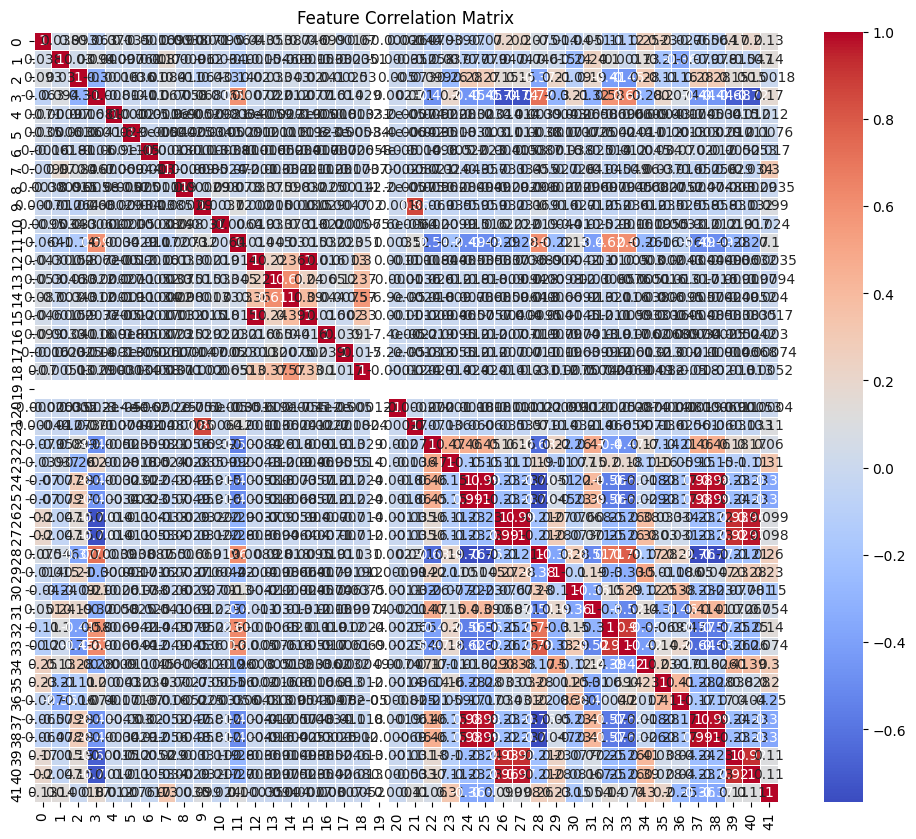

In [28]:
# Feature Correlation Visualization
correlation_matrix = pd.DataFrame(X.reshape(X.shape[0], -1)).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

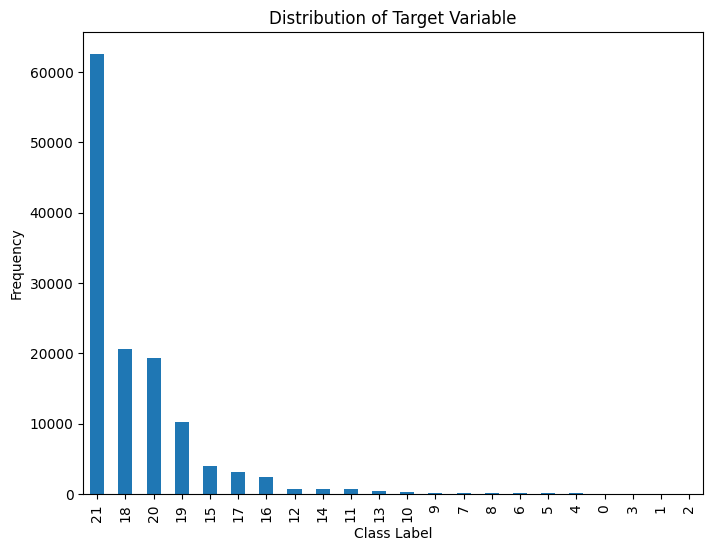

In [29]:
# Additional Visualizations
# 1. Distribution of Target Variable
y_counts = pd.Series(y).value_counts()
plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

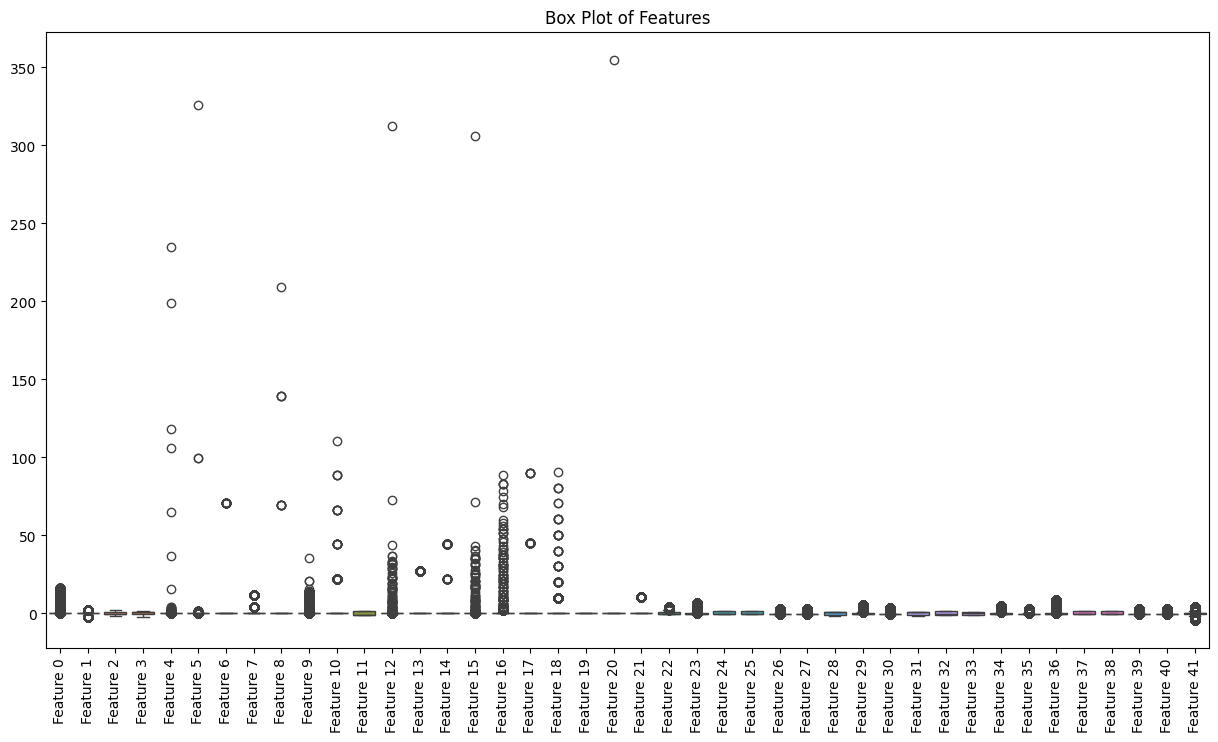

In [31]:
# 3. Box Plot of Features
plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X.reshape(X.shape[0], -1), columns=[f'Feature {i}' for i in range(input_height)]))
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

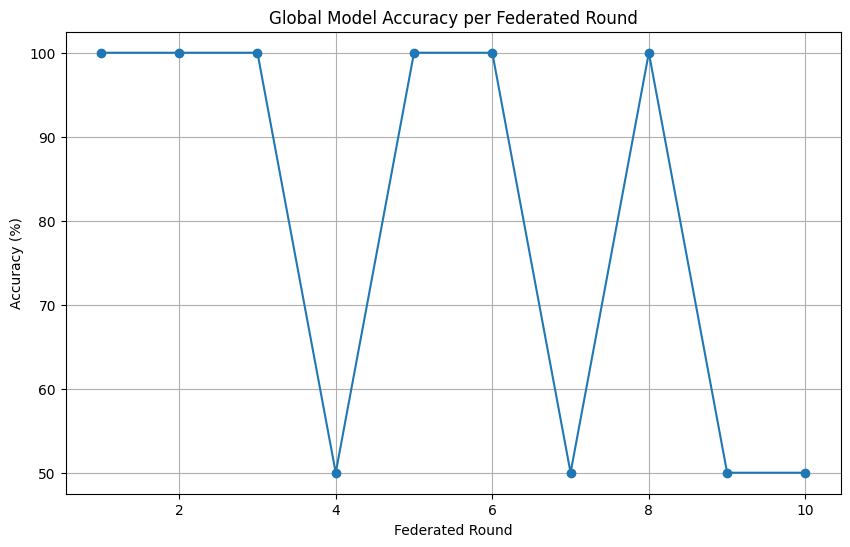

In [33]:
# 4. Accuracy per Round Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(round_accuracies) + 1), round_accuracies, marker='o')
plt.xlabel('Federated Round')
plt.ylabel('Accuracy (%)')
plt.title('Global Model Accuracy per Federated Round')
plt.grid(True)
plt.show()

In [46]:
save_model (global_model, path="global_model.pth")

Model saved to global_model.pth


In [47]:
torch.save(global_model, "global_model_full.pth")

In [48]:
model = torch.load("global_model_full.pth")
model.eval()

<ipython-input-48-e7bbfb5dc020>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("global_model_full.pth")


SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 1), stride=(1, 1))
  (relu): ReLU()
  (fc): Linear(in_features=640, out_features=22, bias=True)
)

In [49]:
import pickle

with open("global_model.pkl", "wb") as f:
    pickle.dump(global_model, f)

In [50]:
with open("global_model.pkl", "rb") as f:
    model = pickle.load(f)